In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

In [2]:
airports = [
"BGI", "CDG", "DEL", "DOH", "DSM", "EWR", "EYW", "HND", "ICN",
"JFK", "LGA", "LHR", "ORD", "SAN", "SFO", "SIN", "TLV", "BUD"]
x2= len(airports)
routes = [
["DSM", "ORD"], 
["ORD", "BGI"], 
["BGI", "LGA"], 
["SIN", "CDG"], 
["CDG", "SIN"], 
["CDG", "BUD"], 
["DEL", "DOH"], 
["DEL", "CDG"], 
["TLV", "DEL"], 
["EWR", "HND"], 
["HND", "ICN"], 
["HND", "JFK"], 
["ICN", "JFK"], 
["JFK", "LGA"], 
["EYW", "LHR"], 
["LHR", "SFO"], 
["SFO", "SAN"], 
["SFO", "DSM"], 
["SAN", "EYW"]]

In [3]:
labels={}
for i in range(0,x2):
    labels[i] = airports[i]
print(labels)

{0: 'BGI', 1: 'CDG', 2: 'DEL', 3: 'DOH', 4: 'DSM', 5: 'EWR', 6: 'EYW', 7: 'HND', 8: 'ICN', 9: 'JFK', 10: 'LGA', 11: 'LHR', 12: 'ORD', 13: 'SAN', 14: 'SFO', 15: 'SIN', 16: 'TLV', 17: 'BUD'}


Total number of nodes:  18
Total number of edges:  19
List of all nodes:  ['DSM', 'ORD', 'BGI', 'LGA', 'SIN', 'CDG', 'BUD', 'DEL', 'DOH', 'TLV', 'EWR', 'HND', 'ICN', 'JFK', 'EYW', 'LHR', 'SFO', 'SAN']
List of all edges:  [('DSM', 'ORD', {}), ('ORD', 'BGI', {}), ('BGI', 'LGA', {}), ('SIN', 'CDG', {}), ('CDG', 'SIN', {}), ('CDG', 'BUD', {}), ('DEL', 'DOH', {}), ('DEL', 'CDG', {}), ('TLV', 'DEL', {}), ('EWR', 'HND', {}), ('HND', 'ICN', {}), ('HND', 'JFK', {}), ('ICN', 'JFK', {}), ('JFK', 'LGA', {}), ('EYW', 'LHR', {}), ('LHR', 'SFO', {}), ('SFO', 'SAN', {}), ('SFO', 'DSM', {}), ('SAN', 'EYW', {})]
Degree for all nodes:  {'DSM': 2, 'ORD': 2, 'BGI': 2, 'LGA': 2, 'SIN': 2, 'CDG': 4, 'BUD': 1, 'DEL': 3, 'DOH': 1, 'TLV': 1, 'EWR': 1, 'HND': 3, 'ICN': 2, 'JFK': 3, 'EYW': 2, 'LHR': 2, 'SFO': 3, 'SAN': 2}


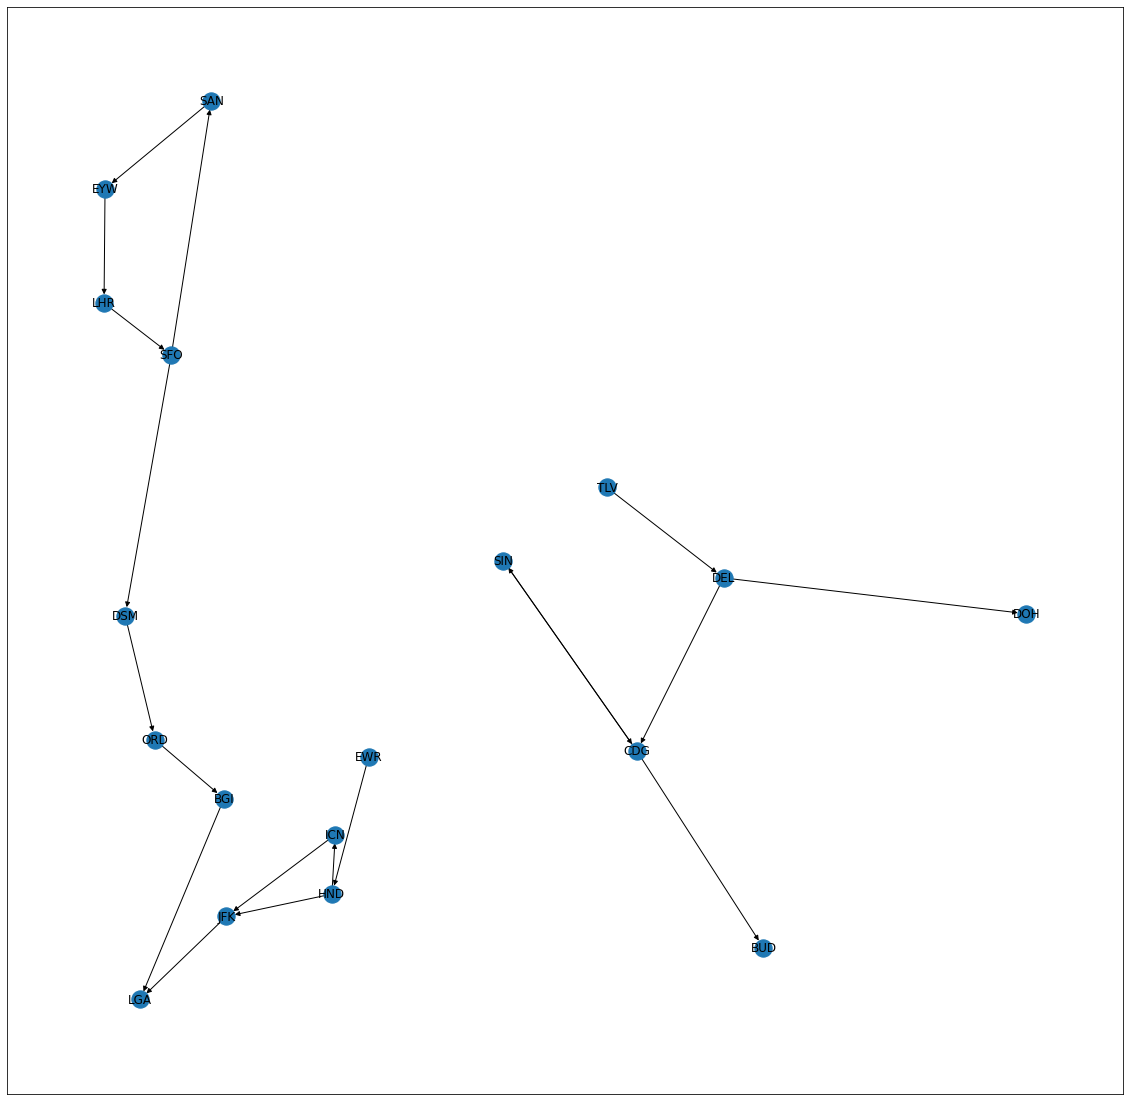

In [4]:
import networkx as nx 
G = nx.DiGraph()
  
G.add_edges_from(routes)
plt.figure(figsize =(20,20))   
nx.draw_networkx(G, with_label = True) 
  
print("Total number of nodes: ", int(G.number_of_nodes())) 
print("Total number of edges: ", int(G.number_of_edges())) 
print("List of all nodes: ", list(G.nodes())) 
print("List of all edges: ", list(G.edges(data = True))) 
print("Degree for all nodes: ", dict(G.degree())) 

In [5]:

# create lookup dictionary
lookup = {}
# add a key in the dictionary for every airport
for i in airports:
    lookup[i] = []
# add the values (possible destinations) to every key
for i in routes:
    lookup[i[0]].append(i[1])
# Route possibility function
def pos_route(start, destination):
    possible = 0
    
    # check for separation 0
    list0 = []
    for s0 in lookup[start]: # refers to previous level
        list0.append(s0)
    for i0 in range(len(list0)):
        if list0[i0] == destination:
            possible = 1
        else:
            # check for separation 1
            list1 = []
            for s1 in lookup[list0[i0]]: # refers to previous level
                list1.append(s1)
            for i1 in range(len(list1)):
                if list1[i1] == destination and (possible == 0 or possible > 2):
                    possible = 2
                else:
                    # check for separation 2
                    list2 = []
                    for s2 in lookup[list1[i1]]: # refers to previous level
                        list2.append(s2)
                    for i2 in range(len(list2)):
                        if list2[i2] == destination and (possible == 0 or possible > 3):
                            possible = 3
                        else:
                            # check for separation 3
                            list3 = []
                            for s3 in lookup[list2[i2]]: # refers to previous level
                                list3.append(s3)
                            for i3 in range(len(list3)):
                                if list3[i3] == destination and (possible == 0 or possible > 4):
                                    possible = 4
                                else:
                                    # check for separation 4
                                    list4 = []
                                    for s4 in lookup[list3[i3]]: # refers to previous level
                                        list4.append(s4)
                                    for i4 in range(len(list4)):
                                        if list4[i4] == destination and (possible == 0 or possible > 5):
                                            possible = 5
                                        else:
                                            # check for separation 5
                                            list5 = []
                                            for s5 in lookup[list4[i4]]: # refers to previous level
                                                list5.append(s5)
                                            for i5 in range(len(list5)):
                                                if list5[i5] == destination and (possible == 0 or possible > 6):
                                                    possible = 6
                                                #else:
    if possible > 0:
        return possible
    else:
        return False

def addcheck(airport):
    original = lookup[airport][:]
    
    for i in airports:
        lookup[airport].append(i)
        max = 0
        for ii in airports:
            if pos_route(airport, ii) != False:
                max += 1
        print("Adding a connection to " + i + " gives " + str(max) + " destinations.")
        del lookup[airport]
        lookup[airport] = original[:]
        potential = 0

switcher = 0
airport = input("Select an airport: ")
while switcher != "END":
    for i in airports:
        print(airport + " to " + i + " in " + str(pos_route(airport, i))) # print where you can get to from given airport
    print()
    for i in airports:
        print(i, "-->", lookup[i]) # print current available connections from each airport
    print()
    addcheck(airport) # check the potential of all possible connections (higher is better)
    print()
    switcher = input("Which connection do you want to add? (END to exit): ") # allow user to try adding a connection or end loop
    
    if switcher != "END":
        lookup[airport].append(switcher)
        ro=[]
        ro.append(airport)
        ro.append(switcher)
        routes.append(ro)
    print()

Select an airport: LGA
LGA to BGI in False
LGA to CDG in False
LGA to DEL in False
LGA to DOH in False
LGA to DSM in False
LGA to EWR in False
LGA to EYW in False
LGA to HND in False
LGA to ICN in False
LGA to JFK in False
LGA to LGA in False
LGA to LHR in False
LGA to ORD in False
LGA to SAN in False
LGA to SFO in False
LGA to SIN in False
LGA to TLV in False
LGA to BUD in False

BGI --> ['LGA']
CDG --> ['SIN', 'BUD']
DEL --> ['DOH', 'CDG']
DOH --> []
DSM --> ['ORD']
EWR --> ['HND']
EYW --> ['LHR']
HND --> ['ICN', 'JFK']
ICN --> ['JFK']
JFK --> ['LGA']
LGA --> []
LHR --> ['SFO']
ORD --> ['BGI']
SAN --> ['EYW']
SFO --> ['SAN', 'DSM']
SIN --> ['CDG']
TLV --> ['DEL']
BUD --> []

Adding a connection to BGI gives 2 destinations.
Adding a connection to CDG gives 3 destinations.
Adding a connection to DEL gives 5 destinations.
Adding a connection to DOH gives 1 destinations.
Adding a connection to DSM gives 4 destinations.
Adding a connection to EWR gives 5 destinations.
Adding a connection 

In [6]:
print(routes)
print(len(routes))

[['DSM', 'ORD'], ['ORD', 'BGI'], ['BGI', 'LGA'], ['SIN', 'CDG'], ['CDG', 'SIN'], ['CDG', 'BUD'], ['DEL', 'DOH'], ['DEL', 'CDG'], ['TLV', 'DEL'], ['EWR', 'HND'], ['HND', 'ICN'], ['HND', 'JFK'], ['ICN', 'JFK'], ['JFK', 'LGA'], ['EYW', 'LHR'], ['LHR', 'SFO'], ['SFO', 'SAN'], ['SFO', 'DSM'], ['SAN', 'EYW'], ['LGA', 'SFO'], ['LGA', 'TLV'], ['LGA', 'EWR']]
22


Total number of nodes:  18
Total number of edges:  22
List of all nodes:  ['DSM', 'ORD', 'BGI', 'LGA', 'SIN', 'CDG', 'BUD', 'DEL', 'DOH', 'TLV', 'EWR', 'HND', 'ICN', 'JFK', 'EYW', 'LHR', 'SFO', 'SAN']
List of all edges:  [('DSM', 'ORD', {}), ('ORD', 'BGI', {}), ('BGI', 'LGA', {}), ('LGA', 'SFO', {}), ('LGA', 'TLV', {}), ('LGA', 'EWR', {}), ('SIN', 'CDG', {}), ('CDG', 'SIN', {}), ('CDG', 'BUD', {}), ('DEL', 'DOH', {}), ('DEL', 'CDG', {}), ('TLV', 'DEL', {}), ('EWR', 'HND', {}), ('HND', 'ICN', {}), ('HND', 'JFK', {}), ('ICN', 'JFK', {}), ('JFK', 'LGA', {}), ('EYW', 'LHR', {}), ('LHR', 'SFO', {}), ('SFO', 'SAN', {}), ('SFO', 'DSM', {}), ('SAN', 'EYW', {})]
Degree for all nodes:  {'DSM': 2, 'ORD': 2, 'BGI': 2, 'LGA': 5, 'SIN': 2, 'CDG': 4, 'BUD': 1, 'DEL': 3, 'DOH': 1, 'TLV': 2, 'EWR': 2, 'HND': 3, 'ICN': 2, 'JFK': 3, 'EYW': 2, 'LHR': 2, 'SFO': 4, 'SAN': 2}


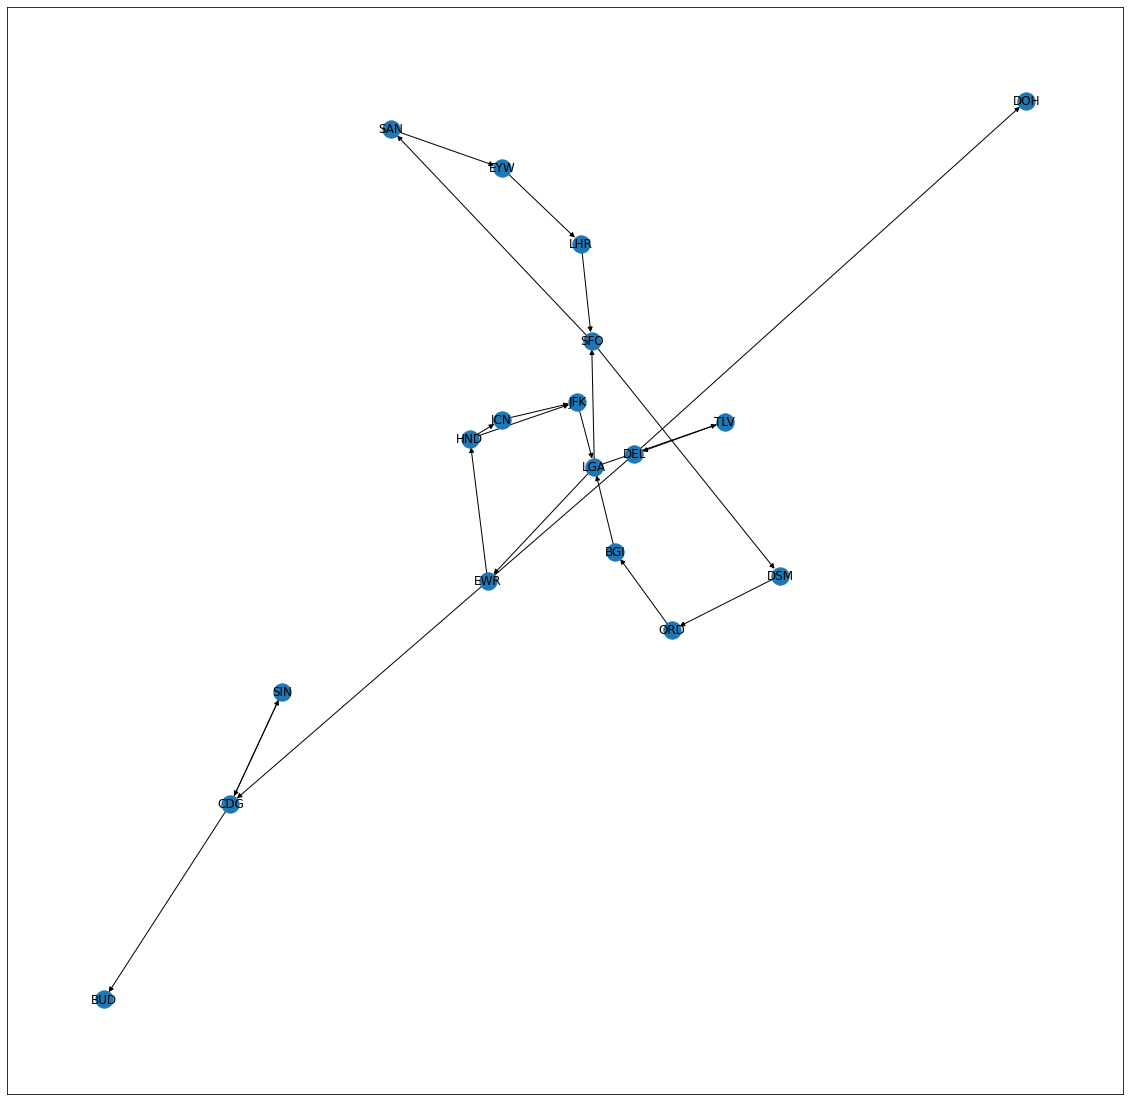

In [7]:
import networkx as nx
G = nx.DiGraph()
G.add_edges_from(routes) 
plt.figure(figsize =(20,20))   
nx.draw_networkx(G, with_label = True) 

print("Total number of nodes: ", int(G.number_of_nodes())) 
print("Total number of edges: ", int(G.number_of_edges())) 
print("List of all nodes: ", list(G.nodes())) 
print("List of all edges: ", list(G.edges(data = True))) 
print("Degree for all nodes: ", dict(G.degree()))